# Day1.2 NeuralNetwork

### Ïã§Ïäµ Î™©Ìëú
- PyTorchÎ•º ÏÇ¨Ïö©Ìï¥ Neural Network Î™®Îç∏ÏùÑ Íµ¨Ï∂ïÌï¥Î≥¥Í∏∞
- Shallow Neural NetworkÏôÄ Deep Neural NetworkÏùò Ï∞®Ïù¥Î•º ÌôïÏù∏ÌïòÍ∏∞

## 0. Setting

- Îü∞ÌÉÄÏûÑ > Îü∞ÌÉÄÏûÑ Ïú†Ìòï Î≥ÄÍ≤Ω > GPU



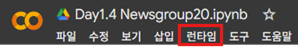

image.png

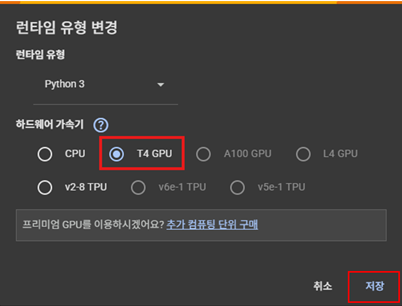

- ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏÑ§Ïπò Î∞è Ìò∏Ï∂ú

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

- GPU ÏÑ§Ï†ï

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


## 1. Îç∞Ïù¥ÌÑ∞ÏÖã Ï§ÄÎπÑ

- Îç∞Ïù¥ÌÑ∞ÏÖãÏùÄ Input(X)Í≥º Label(Y)Î°ú Íµ¨ÏÑ±
  - Input(X) : Î™®Îç∏ÏóêÍ≤å ÏûÖÎ†•ÏúºÎ°ú Ï£ºÏñ¥ÏßÄÎäî Í∞í
  - Label(Y) : InputÏù¥ Ï£ºÏñ¥Ï°åÏùÑ Îïå, Î™®Îç∏Ïù¥ ÏòàÏ∏°Ìï¥Ïïº ÌïòÎäî Ï†ïÎãµ Í∞í
        (ÏòàÏãú 1)
        Input(X) : ÏÉÅÌíàÏùò Í¥ëÍ≥†ÎπÑ, Ìï†Ïù∏Ïú®
        Label(Y) : ÏÉÅÌíàÏùò ÌåêÎß§Îüâ

        (ÏòàÏãú 2)
        Input(X) : Í∏∞Ïò®, ÏäµÎèÑ
        Label(Y) : Î∂àÏæå ÏßÄÏàò
- Î™®Îç∏ÏùÄ ÌïôÏäµÏùÑ ÌÜµÌï¥ Îç∞Ïù¥ÌÑ∞ ÏÖãÏùò **Ìå®ÌÑ¥**ÏùÑ ÌïôÏäµ
- Ïù¥Î≤à Ïã§ÏäµÏóêÏÑúÎäî ÏïÑÎûòÏôÄ Í∞ôÏùÄ Îç∞Ïù¥ÌÑ∞ ÏÖãÏùÑ ÏÇ¨Ïö©

image.png

In [3]:
# Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±
x = torch.rand(1000, 2) * 2 - 1 # InputÏùÄ x1Í≥º x2, Í∞ÅÍ∞ÅÏùÄ -1 ÏóêÏÑú 1 ÏÇ¨Ïù¥Ïùò Ïã§Ïàò
y = (x[:, 0]**2 + x[:, 1]**2).unsqueeze(1) # LabelÏùÄ y=x1^2+x2^2

- Train Îç∞Ïù¥ÌÑ∞ÏÖãÍ≥º Test Îç∞Ïù¥ÌÑ∞ÏÖã
  - Train Îç∞Ïù¥ÌÑ∞ÏÖã : Î™®Îç∏Ïù¥ ÌïôÏäµÏóê ÏÇ¨Ïö©ÌïòÎäî Îç∞Ïù¥ÌÑ∞ÏÖã
  - Test Îç∞Ïù¥ÌÑ∞ÏÖã : ÌïôÏäµÏùÑ ÎÅùÎßàÏπú Î™®Îç∏Ïù¥ ÏñºÎßàÎÇò Ïûò ÏòàÏ∏°ÌïòÎäîÏßÄÎ•º ÌèâÍ∞ÄÌïòÍ∏∞ ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ÏÖã
- ÏùºÎ∞òÏ†ÅÏúºÎ°ú Train Îç∞Ïù¥ÌÑ∞ÏÖãÍ≥º Test Îç∞Ïù¥ÌÑ∞ÏÖãÏùÄ ÏôÑÎ≤ΩÌûà Î∂ÑÎ¶¨ÎêòÏñ¥ Ï§ÄÎπÑÌï¥ÏïºÌï®
- Ïã§ÏäµÏóêÏÑ† Ï§ÄÎπÑÌïú 1000Í∞úÏùò Îç∞Ïù¥ÌÑ∞ Ï§ë 800Í∞úÎäî Train Îç∞Ïù¥ÌÑ∞ÏÖãÏúºÎ°ú, 200Í∞úÎäî Test Îç∞Ïù¥ÌÑ∞ÏÖãÏúºÎ°ú ÏÇ¨Ïö©

In [4]:
# Train Îç∞Ïù¥ÌÑ∞ÏÖã
x_train = x[:800]
y_train = y[:800]

# Test Îç∞Ïù¥ÌÑ∞ÏÖã
x_test = x[200:]
y_test = y[200:]

## 2. Î™®Îç∏ Íµ¨Ï∂ï, ÌïôÏäµ, ÌèâÍ∞Ä

#### 2.1 Shallow Neural Network Î™®Îç∏
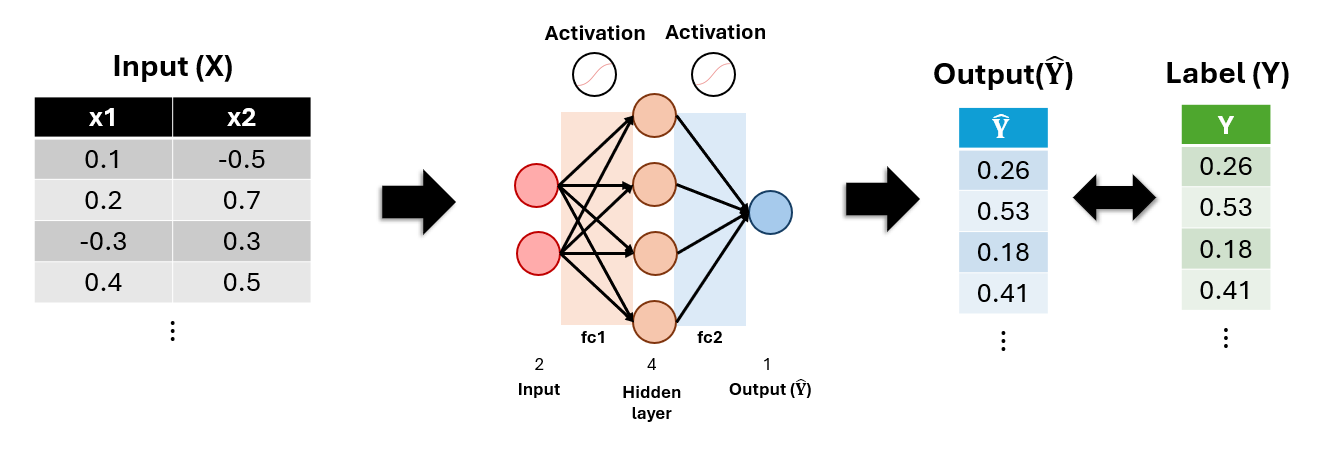
  - Ï¥ù 2Í∞úÏùò fully connected layerÎ°ú Íµ¨ÏÑ±Îêú ShallowÌïú Neural Network Î™®Îç∏ÏùÑ Ï†ïÏùò
  - Í∞ÅÍ∞ÅÏùò fully connected layerÎäî Activation Ìï®ÏàòÎ•º Ìè¨Ìï®
  - `nn.Module` ÌÅ¥ÎûòÏä§Î•º ÏÉÅÏÜçÎ∞õÏùÄ ÌÅ¥ÎûòÏä§Î°ú Ï†ïÏùòÎê®
  - Ï£ºÏöî Ìï®Ïàò(Î©îÏÑúÎìú)
    - `__init__` : Î™®Îç∏ ÏÉùÏÑ± Ïãú Ïã§ÌñâÎêòÎäî Ìï®Ïàò, ÏùºÎ∞òÏ†ÅÏúºÎ°ú Î™®Îç∏Ïùò layerÎì§ÏùÑ Ï†ïÏùò
    - `forward` : Î™®Îç∏Ïóê ÏûÖÎ†•Ïù¥ Îì§Ïñ¥ÏôîÏùÑ Îïå, layerÎì§ÏùÑ ÌÜµÍ≥ºÏãúÌÇ§Í≥† Í∑∏ Í≤∞Í≥ºÎ•º Î∞òÌôòÌïòÎäî Ìï®Ïàò
  - LayerÏùò Ï¢ÖÎ•ò

    image.png

    - `nn.Linear(input_dim, output_dim)`
      - `input_dim` : ÏûÖÎ†•ÎêòÎäî Îç∞Ïù¥ÌÑ∞Ïùò ÌÅ¨Í∏∞ (Ï∞®Ïõê)
      - `output_dim` : layerÎ•º ÌÜµÍ≥ºÌïòÍ≥† ÎÇú Îí§ Îç∞Ïù¥ÌÑ∞Ïùò ÌÅ¨Í∏∞ (Ï∞®Ïõê)
    - `nn.ReLU()` : ReLU Activation Ìï®Ïàò
  

In [5]:
class ShallowNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(2, 4)
        self.output = nn.Linear(4, 1)
        self.activation = nn.ReLU()

    def forward(self, x):
        x = self.activation(self.hidden(x))
        x = self.output(x)
        return x

- `nn.Sequential` : Îã§ÏàòÏùò layerÎ•º ÌïòÎÇòÎ°ú Î¨∂Ïñ¥Ï£ºÎäî ÌÅ¥ÎûòÏä§

In [6]:
class ShallowNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
          nn.Linear(2, 4),
          nn.ReLU(),
          nn.Linear(4, 1),
        )

    def forward(self, x):
        x = self.layers(x)
        return x

-  Î™®Îç∏ ÌïôÏäµ Ï§ÄÎπÑ
  <details>
  <summary>ÏÉÅÏÑ∏ Ï†ïÎ≥¥</summary>

  - Loss Function : Î™®Îç∏Ïùò outputÏù¥ Ïã§Ï†ú Ï†ïÎãµÍ≥º ÏñºÎßàÎÇò Ïú†ÏÇ¨ÌïúÏßÄÎ•º ÎÇòÌÉÄÎÇ¥Îäî Ìï®Ïàò
  
    - Îëê Í∞íÏù¥ ÏÑúÎ°ú Ïú†ÏÇ¨Ìï†ÏàòÎ°ù Ìï®ÏàòÍ∞íÏù¥ ÏûëÏïÑÏßÄÎ©∞, Ïù¥ Ìï®ÏàòÎ•º ÏµúÏÜåÌôî ÌïòÎäî Í≤ÉÏù¥ Î™®Îç∏Ïùò ÏµúÏ¢Ö ÌïôÏäµ Î™©Ìëú

  - Optimizer : Loss functionÏù¥ ÏµúÏÜåÌôîÎêòÎèÑÎ°ù Î™®Îç∏Ïùò WeightÎ•º ÏóÖÎç∞Ïù¥Ìä∏ ÌïòÎäî Ïó≠Ìï†

  - Learning Rate : Î™®Îç∏Ïù¥ WeightÎ•º **ÏñºÎßàÎÇò** ÏóÖÎç∞Ïù¥Ìä∏ Ìï† ÏßÄÎ•º Í≤∞Ï†ïÌïòÎäî Ïó≠Ìï†
  </details>

In [7]:
shallow_model = ShallowNN()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(shallow_model.parameters(), lr=0.1)

- Î™®Îç∏ ÌïôÏäµ Î∞è ÌèâÍ∞Ä
  - Î™®Îç∏ÏùÑ 1Î≤à ÌïôÏäµÌï† ÎïåÎßàÎã§ ÏÑ±Îä•ÏùÑ ÌèâÍ∞Ä

  - ÏÑ±Îä• ÌèâÍ∞Ä ÏßÄÌëú : Test Loss
    - Î™®Îç∏Ïù¥ Test Îç∞Ïù¥ÌÑ∞ÏÖãÏóê Input(X)Î•º ÏûÖÎ†•Î∞õÏïòÏùÑ Îïå Ìï¥Îãπ Îç∞Ïù¥ÌÑ∞Ïùò ÎùºÎ≤®(Y)Î•º ÏñºÎßàÎÇò Ïûò ÏòàÏ∏°ÌïòÎäîÏßÄÎ•º ÌèâÍ∞Ä (ÎÇÆÏùÑÏàòÎ°ù Ï¢ãÏùÄ ÏÑ±Îä•)

<details>
<summary>ÏÉÅÏÑ∏ Ï†ïÎ≥¥</summary>

- ÌïôÏäµ : Train Îç∞Ïù¥ÌÑ∞ÏÖãÏúºÎ°ú, Î™®Îç∏Ïùò outputÏù¥ Ïã§Ï†ú Ï†ïÎãµÍ≥º Ïú†ÏÇ¨Ìï¥ÏßÄÎèÑÎ°ù, Ï¶â Loss functionÏù¥ ÏµúÏÜåÌôîÎêòÎèÑÎ°ù OptimizerÎ•º ÌÜµÌï¥ ÌïôÏäµ

- ÌèâÍ∞Ä : ÌïôÏäµÌïú Î™®Îç∏Ïù¥ Test Îç∞Ïù¥ÌÑ∞ÏÖãÏùò ÎùºÎ≤®ÏùÑ ÏñºÎßàÎÇò Ïûò ÏòàÏ∏°ÌïòÎäîÏßÄ ÌèâÍ∞Ä

</details>

In [8]:
# Î™®Îç∏ÏùÑ ÌïôÏäµÌï† ÌöüÏàò
num_epochs = 100

shallow_test_losses = []

for epoch in range(num_epochs):
    # Î™®Îç∏ ÌïôÏäµ
    shallow_model.train()
    y_pred = shallow_model(x_train)
    train_loss = criterion(y_pred, y_train)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    # Î™®Îç∏ ÌèâÍ∞Ä
    shallow_model.eval()
    with torch.no_grad():
        test_pred = shallow_model(x_test)
        test_loss = criterion(test_pred, y_test)

    if (epoch + 1) % 10 == 0:
        shallow_test_losses.append(test_loss.item())
        print(f"Î™®Îç∏ÏùÑ {epoch+1}Î≤à ÌïôÏäµ ÌñàÏùÑ ÎïåÏùò Test Loss : {test_loss.item():.4f}")

print("Î™®Îç∏ ÌïôÏäµ ÏôÑÎ£å!")

Î™®Îç∏ÏùÑ 10Î≤à ÌïôÏäµ ÌñàÏùÑ ÎïåÏùò Test Loss : 0.1549
Î™®Îç∏ÏùÑ 20Î≤à ÌïôÏäµ ÌñàÏùÑ ÎïåÏùò Test Loss : 0.1471
Î™®Îç∏ÏùÑ 30Î≤à ÌïôÏäµ ÌñàÏùÑ ÎïåÏùò Test Loss : 0.1412
Î™®Îç∏ÏùÑ 40Î≤à ÌïôÏäµ ÌñàÏùÑ ÎïåÏùò Test Loss : 0.1355
Î™®Îç∏ÏùÑ 50Î≤à ÌïôÏäµ ÌñàÏùÑ ÎïåÏùò Test Loss : 0.1300
Î™®Îç∏ÏùÑ 60Î≤à ÌïôÏäµ ÌñàÏùÑ ÎïåÏùò Test Loss : 0.1245
Î™®Îç∏ÏùÑ 70Î≤à ÌïôÏäµ ÌñàÏùÑ ÎïåÏùò Test Loss : 0.1188
Î™®Îç∏ÏùÑ 80Î≤à ÌïôÏäµ ÌñàÏùÑ ÎïåÏùò Test Loss : 0.1130
Î™®Îç∏ÏùÑ 90Î≤à ÌïôÏäµ ÌñàÏùÑ ÎïåÏùò Test Loss : 0.1071
Î™®Îç∏ÏùÑ 100Î≤à ÌïôÏäµ ÌñàÏùÑ ÎïåÏùò Test Loss : 0.1008
Î™®Îç∏ ÌïôÏäµ ÏôÑÎ£å!


In [9]:
# Test LossÎ•º Î™®Îç∏ ÌïôÏäµ ÌöüÏàòÎ≥ÑÎ°ú ÏãúÍ∞ÅÌôî
import matplotlib.pyplot as plt

epochs = list(range(10, num_epochs+1, 10))  # 10, 20, ..., 100

plt.plot(epochs, shallow_test_losses, label='Test Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Shallow Neural Network Test Loss")
plt.legend()
plt.grid(True)
plt.show()

#### 2.2 Deep Neural Network Î™®Îç∏

- Ï¥ù 4Í∞úÏùò fully connected layerÎ°ú Íµ¨ÏÑ±Îêú DeepÌïú Neural Network
- Í∞ÅÍ∞ÅÏùò fully connected layerÎäî Activation Ìï®ÏàòÎ•º Ìè¨Ìï®

image.png

In [10]:
class DeepNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(2, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.net(x)

In [13]:
model = DeepNN()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

num_epochs = 100

deep_test_losses = []

for epoch in range(num_epochs):
    # üîπ ÌïôÏäµ Î™®Îìú
    model.train()
    y_pred = model(x_train)
    train_loss = criterion(y_pred, y_train)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    # üîπ ÌèâÍ∞Ä Î™®Îìú
    model.eval()
    with torch.no_grad():
        test_pred = model(x_test)
        test_loss = criterion(test_pred, y_test)

    # üîπ 10epochÎßàÎã§ Í∏∞Î°ù
    if (epoch + 1) % 10 == 0:
        deep_test_losses.append(test_loss.item())
        print(f"Î™®Îç∏ÏùÑ {epoch+1}Î≤à ÌïôÏäµ ÌñàÏùÑ ÎïåÏùò Test Loss : {test_loss.item():.4f}")

print("Î™®Îç∏ ÌïôÏäµ ÏôÑÎ£å!")

Î™®Îç∏ÏùÑ 10Î≤à ÌïôÏäµ ÌñàÏùÑ ÎïåÏùò Test Loss : 0.0996
Î™®Îç∏ÏùÑ 20Î≤à ÌïôÏäµ ÌñàÏùÑ ÎïåÏùò Test Loss : 0.0273
Î™®Îç∏ÏùÑ 30Î≤à ÌïôÏäµ ÌñàÏùÑ ÎïåÏùò Test Loss : 0.0045
Î™®Îç∏ÏùÑ 40Î≤à ÌïôÏäµ ÌñàÏùÑ ÎïåÏùò Test Loss : 0.0039
Î™®Îç∏ÏùÑ 50Î≤à ÌïôÏäµ ÌñàÏùÑ ÎïåÏùò Test Loss : 0.0017
Î™®Îç∏ÏùÑ 60Î≤à ÌïôÏäµ ÌñàÏùÑ ÎïåÏùò Test Loss : 0.0014
Î™®Îç∏ÏùÑ 70Î≤à ÌïôÏäµ ÌñàÏùÑ ÎïåÏùò Test Loss : 0.0009
Î™®Îç∏ÏùÑ 80Î≤à ÌïôÏäµ ÌñàÏùÑ ÎïåÏùò Test Loss : 0.0007
Î™®Îç∏ÏùÑ 90Î≤à ÌïôÏäµ ÌñàÏùÑ ÎïåÏùò Test Loss : 0.0005
Î™®Îç∏ÏùÑ 100Î≤à ÌïôÏäµ ÌñàÏùÑ ÎïåÏùò Test Loss : 0.0004
Î™®Îç∏ ÌïôÏäµ ÏôÑÎ£å!


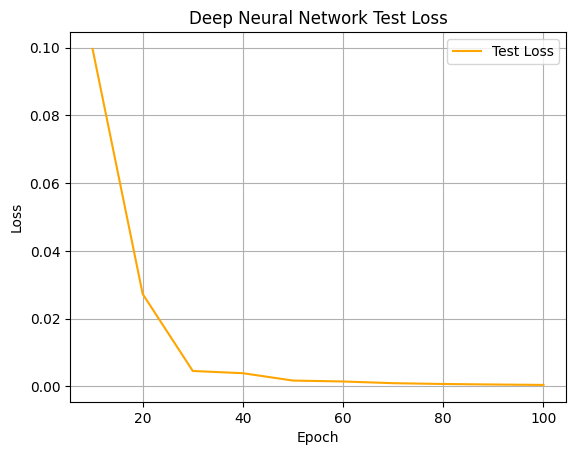

In [14]:
import matplotlib.pyplot as plt

epochs = list(range(10, num_epochs+1, 10))  # 10, 20, ..., 100

plt.plot(epochs, deep_test_losses, label='Test Loss', color='orange')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Deep Neural Network Test Loss")
plt.legend()
plt.grid(True)
plt.show()

- Shallow Neural Network vs. Deep Neural Network ÏÑ±Îä• ÎπÑÍµê
  - Shallow Neural NetworkÏóê ÎπÑÌï¥ Deep Neural NetworkÍ∞Ä Îçî ÎÇÆÏùÄ Test LossÎ•º Î≥¥Ïó¨Ï£ºÎ©∞ ÏÑ±Îä•Ïù¥ Ïö∞ÏàòÌï®

  - Îã®, Ìï≠ÏÉÅ Deep Íµ¨Ï°∞Í∞Ä Îçî Ï¢ãÏùÄ Í≤ÉÏùÄ ÏïÑÎãàÎ©∞, Î¨∏Ï†úÏùò Î≥µÏû°ÎèÑÏôÄ Îç∞Ïù¥ÌÑ∞Ïóê Îî∞Îùº Ï†ÅÏ†àÌïú Ï∏µ ÏàòÏôÄ Íµ¨Ï°∞Î•º ÏÑ†ÌÉùÌïòÎäî Í≤ÉÏù¥ Ï§ëÏöîÌï®

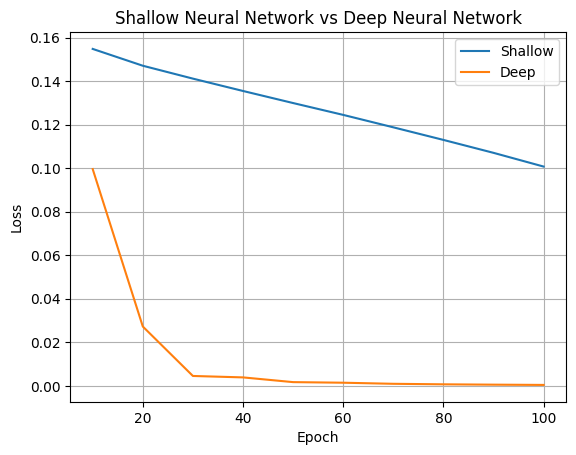

In [15]:
import matplotlib.pyplot as plt

epochs = list(range(10, num_epochs+1, 10))  # 10, 20, ..., 100

plt.plot(epochs, shallow_test_losses, label='Shallow')
plt.plot(epochs, deep_test_losses, label='Deep')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Shallow Neural Network vs Deep Neural Network")
plt.legend()
plt.grid(True)
plt.show()